# Calculus

In [1]:
%pip install torch 
%pip install d2l==1.0.3
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
  Obtaining dependency information for d2l==1.0.3 from https://files.pythonhosted.org/packages/8b/39/418ef003ed7ec0f2a071e24ec3f58c7b1f179ef44bec5224dcca276876e3/d2l-1.0.3-py3-none-any.whl.metadata
  Using cached d2l-1.0.3-py3-none-any.whl.metadata (556 bytes)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 5.6 MB/s eta 0:00:0000:0100:01
  Obtaining dependency information for matplotlib==3.7.2 from https://files.pythonhosted.org/packages/a3/e5/c9cdc737ea2256285dc1b28e8ecbf649c716cfc7b1ee12a8be6d4cf1feb7/matplotlib-3.7.2-cp39-cp39-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for pandas==2.0.3 from https://files.pythonhosted.org/packages/6c/1c/689c9d99bc4e5d366a5fd871f0bcdee98a6581e240f96b78d2d08f103774/pandas-2.0.3-cp39-cp39-macosx_11_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.9/28.9 MB 8.0 MB/s eta 0:00:0000:0100:01
  Obtaining dependency information for notebook

In [2]:
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

# 2.4.1 Derivatives and Differentiation

In [3]:
def f(x):
    return 3 * x ** 2 - 4 * x

In [4]:
for h in 10.0**np.arange(-1, -6, -1):
    print(f'h={h:.5f}, numerical limit={(f(1+h)-f(1))/h:.5f}')

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


# 2.4.2 Visualization Utilities

In [5]:
def use_svg_display():  #@save
    """Use the svg format to display a plot in Jupyter."""
    backend_inline.set_matplotlib_formats('svg')

In [6]:
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """Set the figure size for matplotlib."""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [7]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
    axes.set_xscale(xscale), axes.set_yscale(yscale)
    axes.set_xlim(xlim),     axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [8]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=[], xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points."""

    def has_one_axis(X):  # True if X (tensor or list) has 1 axis
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X): X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)

    set_figsize(figsize)
    if axes is None:
        axes = d2l.plt.gca()
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        axes.plot(x,y,fmt) if len(x) else axes.plot(y,fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

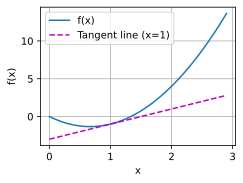

In [9]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

# 2.4.3 Partial Derivatives and Gradients

# 2.4.4 Chain Rule

# 2.4.5 Discussion